# **Example 6** Validation of ATLID level 2 data

This notebook shows how A-EBD profiles (backscatter, extinction, lidar ratio and depol. ratio) can be compared with ground-based data from `.nc`-files.

In [18]:
import earthcarekit as eck

## Requirements

For this example you need a A-EBD file from an overpass and the matching ground data (e.g., PollyNET `.nc`-file).

Paste both file paths into the cell below:

In [19]:
#fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXAG_ATL_EBD_2A_20250620T134014Z_20250620T153539Z_06031D.h5"
#fp_ground = r"D:\earthcarekit_new\ec_data\2025_06_20_Fri_ARI_00_00_01_1246_1345_profiles.nc"
#prefix = "06031D_20250620"
#fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXBA_ATL_EBD_2A_20240918T134404Z_20250727T182434Z_01752D.h5"
#fp_ground = r"D:\earthcarekit_new\ec_data\2024_09_18_Wed_ARI_00_00_01_1321_1420_profiles.nc"
#prefix = "01752D_20240918"
#site = "TROPOS"

fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXBA_ATL_EBD_2A_20250601T031726Z_20250721T133945Z_05729A.h5"
fp_ground = r"D:\earthcarekit_new\ec_data\2025_06_01_Sun_CPV_00_00_01_0241_0334_profiles_QC.nc"
prefix = "05729A_20250601"
site = "Mindelo"


# Also specify the ground site by either setting its name (string) or creating a custom GroundSite object:
#site = site #"meteor_20250126"
#fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXBA_ATL_EBD_2A_20250126T041104Z_20250721T123254Z_03769A.h5"
#fp_ground = r"D:\earthcarekit_new\ec_data\2025_01_26_Sun_ARI_00_00_01_0424_0531_profiles.nc"
#prefix = "03769A_20250126"
#radius_km = 100.0

In [20]:
meteor_20250126 = eck.GroundSite(
    latitude=4.28,
    longitude=-35.35,
    altitude=15,
    name="x"
)


## **6.1** Open and view datasets

In [21]:
print("Open the A-EBD dataset:")
with eck.read_product(fp_aebd) as ds_aebd:
    display(ds_aebd)

print("Open the ground-based dataset:")
with eck.read_nc(fp_ground) as ds_ground:
    display(ds_ground)

Open the A-EBD dataset:


<xarray.Dataset> Size: 230MB
Dimensions:                                                         (
                                                                     along_track: 4869,
                                                                     vertical: 242,
                                                                     layer: 25,
                                                                     n_state: 351)
Dimensions without coordinates: along_track, vertical, layer, n_state
Data variables: (12/74)
    filename                                                        <U60 240B ...
    file_type                                                       <U10 40B ...
    frame_id                                                        <U1 4B 'A'
    orbit_number                                                    uint32 4B ...
    orbit_and_frame                                                 <U6 24B '...
    baseline                                                        <U2 8B 'BA'
    ...                                                              ...
    lidar_ratio_355nm_low_resolution_error                          (along_track, vertical) float32 5MB ...
    retrieved_state_vector                                          (along_track, n_state) float32 7MB ...
    state_vector_prior                                              (along_track, n_state) float32 7MB ...
    state_vector_prior_error                                        (along_track, n_state) float32 7MB ...
    final_chi_square                                                (along_track) float32 19kB ...
    initial_chi_square                                              (along_track) float32 19kB ...

2025-08-07 12:53:41,805 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\utils\read\nc.py:37 - Convert height above ground level to height above ellipsoid.


Open the ground-based dataset:


<xarray.Dataset> Size: 1MB
Dimensions:                          (method: 1, height: 4000,
                                      reference_height: 2)
Dimensions without coordinates: method, height, reference_height
Data variables: (12/95)
    longitude                        (method) float32 4B ...
    latitude                         (method) float32 4B ...
    start_time                       (method) datetime64[s] 8B 2025-06-01T02:...
    end_time                         (method) datetime64[s] 8B 2025-06-01T03:...
    shots                            (method) int32 4B ...
    zenith_angle                     (method) float32 4B ...
    ...                               ...
    LR_aeronet_532                   (method) float32 4B ...
    LR_aeronet_1064                  (method) float32 4B ...
    reference_height_355             (reference_height) float32 8B ...
    reference_height_532             (reference_height) float32 8B ...
    reference_height_1064            (reference_height) float32 8B ...
    height                           (height) float32 16kB 28.74 ... 2.991e+04
Attributes: (12/14)
    Conventions:          CF-1.0
    Licence:              Creative Commons Attribution Share Alike 4.0 Intern...
    Data Policy:          Each PollyNET site has Principal Investigator(s) (P...
    location:             Mindelo
    institute:            Ground-based Remote Sensing Group (TROPOS)
    source:               pollyxt_cpv
    ...                   ...
    contact:              Holger Baars <baars@tropos.de>
    PicassoConfig_Info:   fileinfo_new:/pollyhome/Bildermacher2/todo_filelist...
    PollyConfig_Info:     flagCorrectFalseMShots:0,flagFilterFalseMShots:0,fl...
    CampaignConfig_Info:  name:pollyxt_cpv,location:Mindelo,startTime:739507,...
    PollyData_Info:       pollyType:pollyxt_cpv,pollyDataFile:/pollyhome/Bild...
    history:              Last processing time at 2025-06-02 03:19:15 by poll...

Create a quicklook of the overpass from the A-EBD file:
Note: When plotting profiles from A-PRO products, the `ecquicklook` function will automatically plot only the closest profile within the set radius.


2025-08-07 12:54:11,096 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\plot\quicklook\_cli.py:25 - Plot created (time taken 00:00:30).                                   


Save the quicklook:
Plot saved (time taken 00:00:03): <d:\earthcarekit_new\examples\notebooks\05729A_20250601_aebd_quicklook.png>


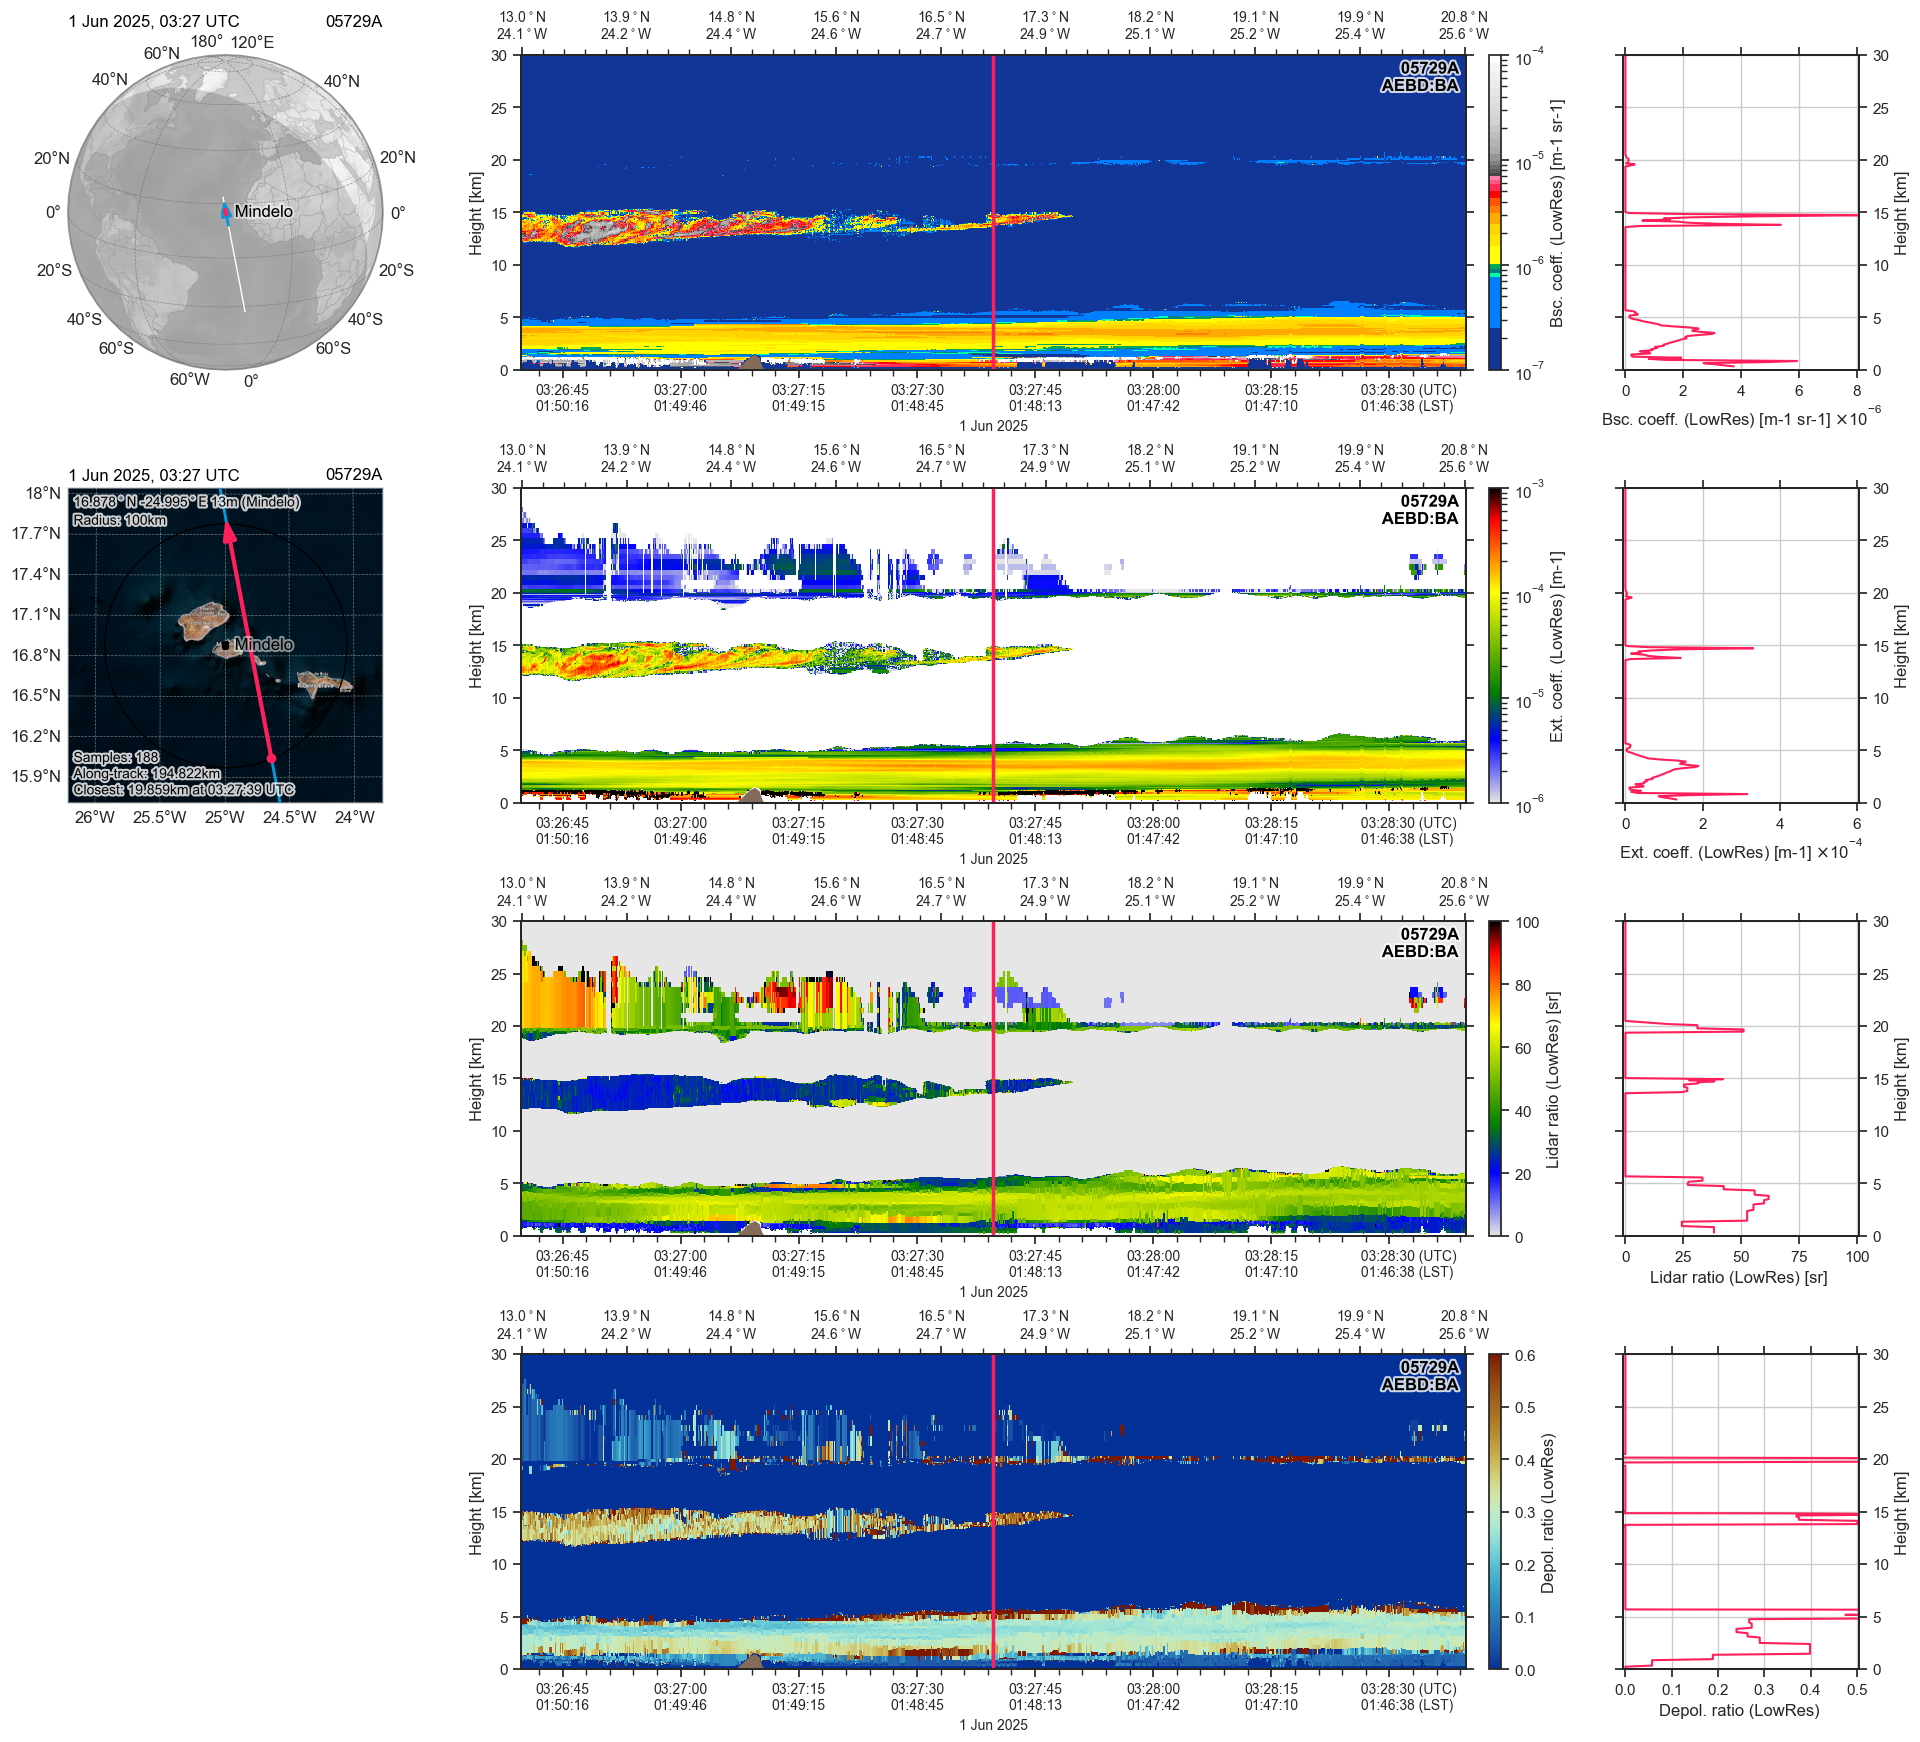

In [22]:
import logging
print("Create a quicklook of the overpass from the A-EBD file:")
print("Note: When plotting profiles from A-PRO products, the `ecquicklook` function will automatically plot only the closest profile within the set radius.")
fig, _ = eck.ecquicklook(
    ds=ds_aebd,
    site=site,#meteor_20250126,
    radius_km=radius_km,
    resolution="low",  # Change the A-EBD resolution as needed
    height_range=(0, 30e3),  # Change the plotting height as needed
    selection_max_time_margin="00:01:00",  # Crop the plot to show only 1 Minute around the overpass start and end times
    logger=logging.getLogger(),  # Optional: Shows plotting progress
)
print("Save the quicklook:")
eck.save_plot(fig, filepath=("./"+prefix+"_aebd_quicklook.png"))

## **Example 6.2** Create backscatter, extinction, lidar ratio and depol. ratio profile plots and comparison statistics 

2025-08-07 12:54:19,950 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\utils\read\nc.py:37 - Convert height above ground level to height above ellipsoid.
c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\calval\_compare_bsc_ext_lr_depol.py:74: UserWarning: Variable `aerExt_klett_355` not in ground-based data.
  warnings.warn(msg)
c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\calval\_compare_bsc_ext_lr_depol.py:74: UserWarning: Variable `aerLR_klett_355` not in ground-based data.
  warnings.warn(msg)


,prediction,target,hmin,hmax,diff_of_means,mae,rmse,mean_diff,mean_prediction,std_prediction,mean_error_prediction,mean_target,std_target,mean_error_target
0,A-EBD low res.,aerBsc_klett_355,3000.0,4000.0,2.788687e-07,2.788687e-07,3.114550e-07,2.788687e-07,0.000002,3.325193e-07,9.498499e-08,0.000003,3.141945e-07,None
1,A-EBD low res.,aerBsc_raman_355,3000.0,4000.0,-1.030028e-07,2.433000e-07,2.964072e-07,-1.030028e-07,0.000002,3.325193e-07,9.498499e-08,0.000002,2.401654e-07,None
2,A-EBD low res.,aerExt_raman_355,3000.0,4000.0,4.456727e-06,1.617523e-05,1.856752e-05,4.456727e-06,0.000149,2.282384e-05,5.953860e-06,0.000154,1.856637e-05,None
3,A-EBD low res.,aerLR_raman_355,3000.0,4000.0,5.093462e+00,5.798679e+00,7.021114e+00,5.093460e+00,59.822083,2.310195e+00,1.688421e+00,64.915544,4.578949e+00,None
4,A-EBD low res.,parDepol_klett_355,3000.0,4000.0,-3.328529e-02,3.370789e-02,4.259913e-02,-3.328530e-02,0.257694,1.642176e-02,1.324781e-02,0.224409,1.092546e-02,None
5,A-EBD low res.,parDepol_raman_355,3000.0,4000.0,-1.146056e-02,1.401771e-02,1.891996e-02,-1.146057e-02,0.257694,1.642176e-02,1.324781e-02,0.246234,6.434074e-03,None


Save the plot:
Plot saved (time taken 00:00:01): <d:\earthcarekit_new\examples\notebooks\05729A_20250601_aebd_vs_polly_profiles.png>
Save the stat. results:


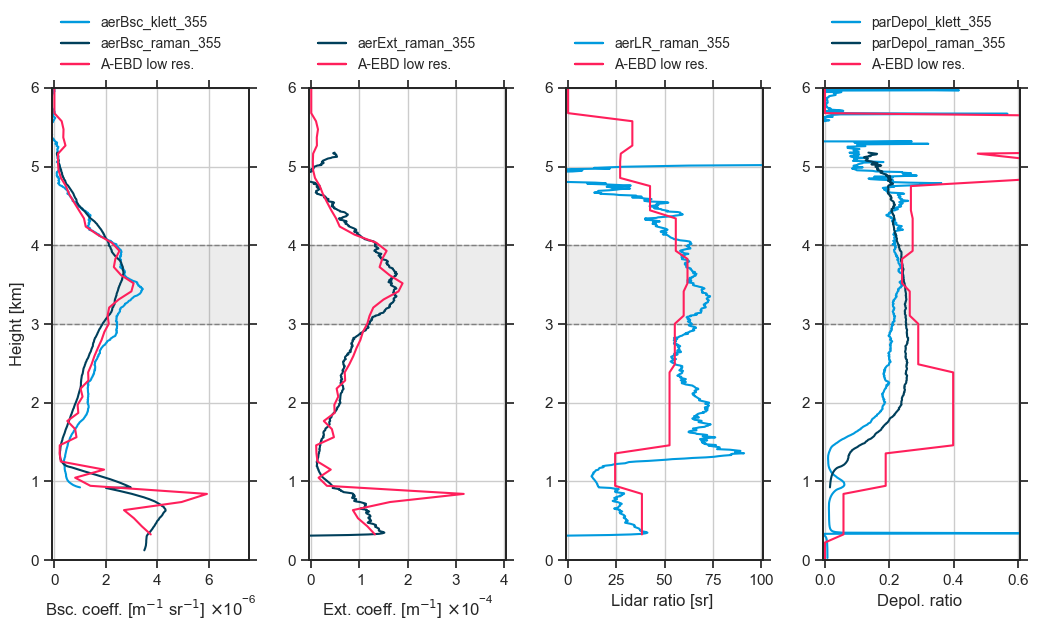

In [23]:
fig, df = eck.compare_bsc_ext_lr_depol(
    fp_ec=fp_aebd,
    fp_target=fp_ground,
    site=site,#meteor_20250126,
    time_var_target="start_time",  # Set to the time variable name in the ground-based dataset
    height_var_target="height",  # Set to the height variable name in the ground-based dataset
    resolustion="low",  # Change the A-EBD resolution as needed
    bsc_var_target=["aerBsc_klett_355", "aerBsc_raman_355"],  # Give at least one bsc. variable name from the ground-based dataset
    ext_var_target=["aerExt_klett_355", "aerExt_raman_355"],  # Give at least one ext. variable name from the ground-based dataset
    lr_var_target=["aerLR_raman_355","aerLR_klett_355"],  # Give at least one LR variable name from the ground-based dataset
    depol_var_target=["parDepol_klett_355", "parDepol_raman_355"],  # Give at least one depol. variable name from the ground-based dataset
    vmax_bsc = 0.0000075,
    vmax_ext= 0.0004,
    vmax_lr = 100,
    vmax_depol = 0.6,
    height_range=(0, 6e3),  # Change the plotting height as needed
    selection_height_range=(3e3, 4e3),  # Change the selected height range to get statistics from as needed or set to None
)
display(df)

print("Save the plot:")
eck.save_plot(fig, filepath=("./"+prefix+"_aebd_vs_polly_profiles.png"))

print("Save the stat. results:")
df.to_csv(("./"+prefix+"__aebd_vs_polly_profiles.csv"), index=False)